# Import Required Libraries

Import the necessary libraries, including pandas and matplotlib.


In [17]:
import numpy as np
import pandas as pd
from scipy.stats import kendalltau, spearmanr

import matplotlib.pyplot as plt
import seaborn as sns

# Read Run Files

Read the two run files into pandas DataFrames.


In [18]:
# Read Run Files
run_folder = "../docs/resources/runs/"
# baseline : BengezzouIdrissMezianeGhilas_1_bm25_article_stop671_porter_k1_b0.5.txt

# Read the first run file into a pandas DataFrame
df1 = pd.read_csv(
    "../docs/resources/runs/before.txt",
    sep=" ",
)

filename = "BengezzouIdrissMezianeGhilas_2_bm25fr_article_stop671_porter_k1_b0.5_alpha3_beta1_gamma2.txt"
df2 = pd.read_csv(
    run_folder + filename,
    sep=" ",
)

In [19]:
print("number of rows in df1: ", len(df1))
print("number of rows in df2: ", len(df2))

number of rows in df1:  48
number of rows in df2:  48


# Compare Run Files

Compare the order of the third column in the two DataFrames and identify the differences.


In [20]:
# we need to compare the two dataframes (only the third column)
df1_col3 = df1.iloc[:, 2]
df2_col3 = df2.iloc[:, 2]

# Compare the two columns and identify the differences
differences = df1_col3.compare(df2_col3)
differences.head()

,self,other


# Calculate Statistics

Calculate statistics on the differences, such as the number of changes, the percentage of changes, or the average change magnitude.

1. Number of Changes: This statistic represents the total count of differences between the two DataFrames. It indicates how many values in the third column of the DataFrames differ from each other.

2. Percentage of Changes: This statistic calculates the percentage of changes in the third column of the DataFrames. It is calculated by dividing the number of changes by the total number of values in the third column and multiplying by 100. It provides a measure of the overall impact of the differences.

3. Average Change Magnitude: This statistic calculates the average magnitude of the changes in the third column of the DataFrames. It represents the average absolute difference between the corresponding values in the two DataFrames. It gives an indication of the typical size of the differences.


posx and posy should be finite values
posx and posy should be finite values


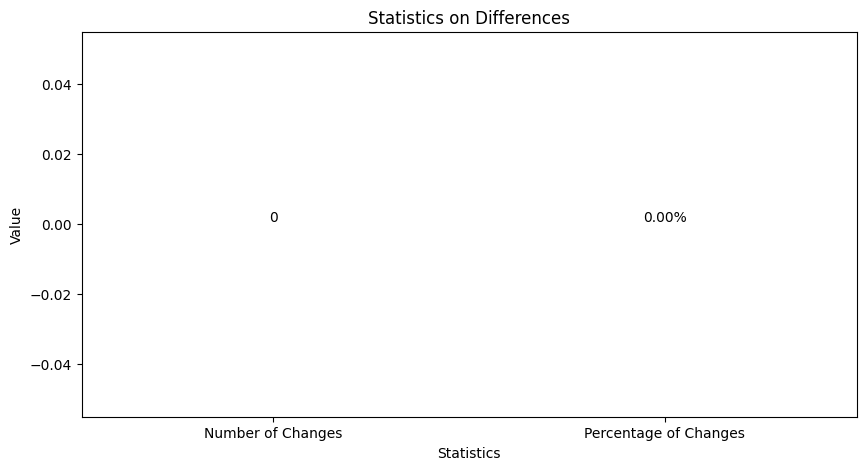

In [21]:
# Calculate the number of changes
num_changes = len(differences)

# Calculate the percentage of changes
percent_changes = (num_changes / len(df1_col3)) * 100

# Calculate the average change magnitude
avg_change_magnitude = differences["self"].mean()

# Create a bar chart to display the statistics
plt.bar(
    ["Number of Changes", "Percentage of Changes", "Average Change Magnitude"],
    [num_changes, percent_changes, avg_change_magnitude],
)

plt.gcf().set_size_inches(10, 5)

# Set the title and labels for the chart
plt.title("Statistics on Differences")
plt.xlabel("Statistics")
plt.ylabel("Value")

# Add text annotations to the bars
plt.text(0, num_changes, str(num_changes), ha="center", va="bottom")
plt.text(1, percent_changes, f"{percent_changes:.2f}%", ha="center", va="bottom")
plt.text(
    2, avg_change_magnitude, f"{avg_change_magnitude:.2f}", ha="center", va="bottom"
)

# Display the chart
plt.show()

# Check the Top Rows

The important point is that we need to have similar tops to have a good MaGp score. If the tops are different, then the MaGp score will be low. We can check the top rows of the two files to see if they are similar.


In [22]:
MAX_ROWS = 1500

# Compare the two columns and identify the differences
df1_top_set = set(df1_col3.iloc[:MAX_ROWS])
df2_top_set = set(df2_col3.iloc[:MAX_ROWS])

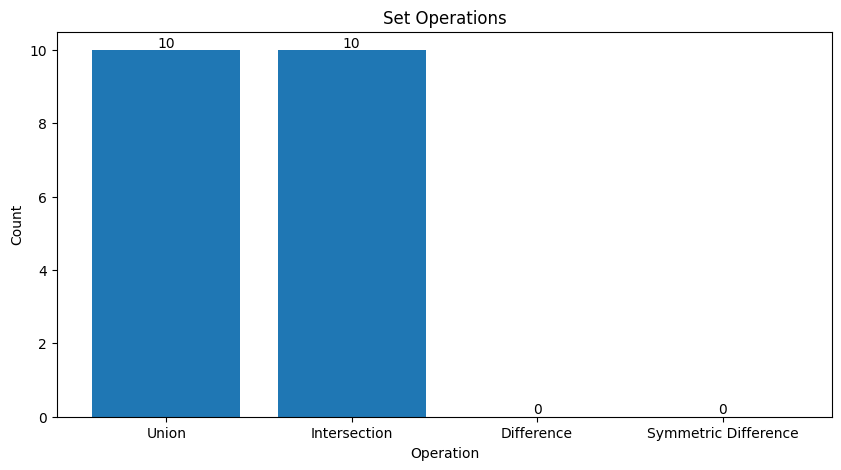

In [23]:
# Calculate the statistics
num_elements_intersection = len(set(df1_top_set).intersection(set(df2_top_set)))
num_elements_union = len(set(df1_top_set).union(set(df2_top_set)))
num_elements_difference = len(set(df1_top_set).difference(set(df2_top_set)))
num_elements_symmetric_difference = len(
    set(df1_top_set).symmetric_difference(set(df2_top_set))
)

# Create a bar chart for the set operations
plt.bar(
    ["Union", "Intersection", "Difference", "Symmetric Difference"],
    [
        num_elements_union,
        num_elements_intersection,
        num_elements_difference,
        num_elements_symmetric_difference,
    ],
)

plt.gcf().set_size_inches(10, 5)

# display the values on top of the bars
plt.text(0, num_elements_union, str(num_elements_union), ha="center", va="bottom")
plt.text(
    1,
    num_elements_intersection,
    str(num_elements_intersection),
    ha="center",
    va="bottom",
)
plt.text(
    2, num_elements_difference, str(num_elements_difference), ha="center", va="bottom"
)
plt.text(
    3,
    num_elements_symmetric_difference,
    str(num_elements_symmetric_difference),
    ha="center",
    va="bottom",
)

# Set the title and labels for the chart
plt.title("Set Operations")
plt.xlabel("Operation")
plt.ylabel("Count")

# Display the chart
plt.show()

# Understanding Ranking Similarity Metrics: Kendall's Tau and Spearman's Rank Correlation

When working with ranked lists, it's essential to assess the similarity between different rankings, especially when the order of items might vary. In our case, we have a baseline list and a test list:

- **Baseline List**: [12, 13, 14, 15, 16, 17, 18, 19, 20, 21]
- **Test List**: [13, 15, 12, 14, 16, 17, 18, 19, 20, 21]

### Kendall's Tau

Kendall's Tau is a **correlation coefficient** that measures the similarity between two rankings. It considers the number of concordant and discordant pairs of elements between the lists. A positive Tau indicates concordance, meaning that the order of elements is similar, even if not identical. The value ranges from -1 to 1, where 1 implies a perfect match, 0 suggests no correlation, and -1 indicates a perfect inverse match.

### Spearman's Rank Correlation

Spearman's Rank Correlation is another **measure of monotonic relationship** between two rankings. It assesses how well the relationship between the ranks of elements in the two lists can be described using a monotonic function. Like Kendall's Tau, Spearman's correlation ranges from -1 to 1. A positive value indicates a positive monotonic relationship, and a negative value indicates a negative monotonic relationship.

### Why Are These Metrics Relevant?

1. **Permutation Tolerance**: Both metrics are robust to variations in the order of elements. In our scenario, where the lists are not identical but might involve permutations or order differences, these metrics provide a comprehensive assessment of similarity.

2. **Non-Linearity Consideration**: Unlike linear correlation metrics, Kendall's Tau and Spearman's Rank Correlation don't assume a linear relationship. This makes them suitable for comparing rankings where the exact position matters more than the magnitude.

By utilizing these metrics, we can have some insights into the degree of similarity between our baseline and test rankings, considering both permutations and order differences.


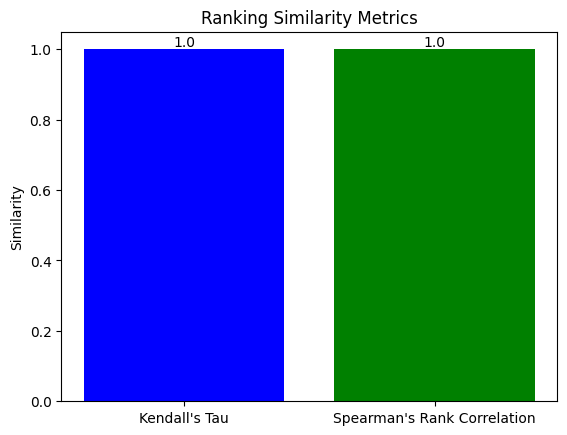

In [24]:
# Extract the tags from the filename
start_tag = "bm25"
end_tag = "stop"
tags = filename.split(start_tag)[1].split(end_tag)[0]

# Convert the columns to lists
list_baseline = df1_col3.iloc[:MAX_ROWS].tolist()
list_test = df2_col3.iloc[:MAX_ROWS].tolist()

# Calculate Kendall's Tau
kendall_tau, _ = kendalltau(list_baseline, list_test)

# Calculate Spearman's Rank Correlation Coefficient
spearman_corr, _ = spearmanr(list_baseline, list_test)

# Plot the results
labels = ["Kendall's Tau", "Spearman's Rank Correlation"]
values = [kendall_tau, spearman_corr]

fig, ax = plt.subplots()
bars = ax.bar(labels, values, color=["blue", "green"])

# Annotate each bar with the exact value
for bar, value in zip(bars, values):
    yval = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        yval,
        round(value, 3),
        ha="center",
        va="bottom",
    )

ax.set_ylabel("Similarity")
ax.set_title("Ranking Similarity Metrics")

# export plots
plt.savefig(f"../docs/resources/plots/plots{tags}.png")

# Show the plot
plt.show()